# Day 1 - 3

* Data pre-processing (day1)
* Linear regression (day2)
* Multiple linear regression (day3)

# Day 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/Avik-Jain/100-Days-Of-ML-Code/master/datasets/Data.csv')
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


## Count missing values

In [13]:
data.isnull().sum()[data.isnull().sum()>0]

Age       1
Salary    1
dtype: int64

In [19]:
X = data.iloc[ : , :-1].values # predictors
Y = data.iloc[ : , 3].values # target

## Handling missing data

In [27]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
X[ :, 1:3] = my_imputer.fit_transform(X[:,1:3])

## Encoding categorical data

In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()

X[:,0] = labelencoder_X.fit_transform(X[:, 0])

## Dummy variables

In [51]:
ohe_X = OneHotEncoder()
X = ohe.fit_transform(X).toarray()
le_Y = LabelEncoder()
Y = le_Y.fit_transform(Y)

In [49]:
le_Y = LabelEncoder()
le_Y.fit_transform(Y)

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## Split datasets

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Feature scaling

In [57]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# Day 2: Simple Linear Regression

In [58]:
import pandas as pd
import numpy as np

In [83]:
student_scores = pd.read_csv('https://raw.githubusercontent.com/duncip/100-Days-Of-ML-Code/master/datasets/studentscores.csv')
X = student_scores.iloc[ :, :1].values
Y = student_scores.iloc[ :, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0)

## Fit simple Linear Regression model

In [117]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [120]:
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

## Visualising

In [94]:
import matplotlib.pyplot as plt

### Training results

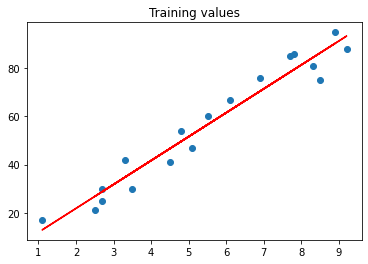

In [121]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.title('Training values')
plt.show()

### Testing results

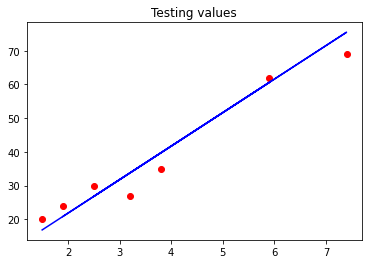

In [122]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, lr.predict(X_test), color = 'blue')
plt.title('Testing values')
plt.show()

In [123]:
lr.predict(X_test)

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

## Calculating MSE/R2

In [124]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print("Coefficients: \n", lr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, lr.predict(X_test)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, lr.predict(X_test)))

Coefficients: 
 [9.94167834]
Mean squared error: 20.33
Coefficient of determination: 0.94
